In [1]:
#Ejercicio 1 Parte 1. Leer el csv de covid, calcular los incrementos y escribir los resultados en un xls
import csv
import json
import xlwt
# Leemos el fichero de serie histórica COVID obtenido del Ministerio de Salud.
# Los datos que nos dan son acumulados, por tanto, el último dato de cada CCAA dará la relación de casos totales.
# Hay que normalizar los datos de forma que no podemos convertir "" a float... cuidado!!!

def normalizar(columna):
    if columna == "":
        columna = 0
    return float(columna)

with open('data/serie_historica_acumulados_22.05.2020.csv', encoding='latin1') as fichero_csv, open('data/covid_agrupado.json', 'w', encoding='utf-8') as fich_escr:
    lector = csv.DictReader(fichero_csv)
    comunidades = []
    lista = []
    for linea in lector:
        comunidad_actual = linea['CCAA']
        #ignorar las notas
        if len(comunidad_actual) == 2:
            #normalizar
            linea['PCR+'] = normalizar(linea['PCR+'])
            linea['TestAc+'] = normalizar(linea['TestAc+'])
            linea['Hospitalizados'] = normalizar(linea['Hospitalizados'])
            linea['UCI'] = normalizar(linea['UCI'])
            linea['Fallecidos'] = normalizar(linea['Fallecidos'])
            linea['CASOS'] = linea['PCR+'] + linea['TestAc+']
            #print(linea)
            
            if comunidad_actual not in comunidades:
                comunidades.append(comunidad_actual)
        lista.append(linea)
        
    #print(lista)
    lista_final = []
    for c in comunidades:
        linea_anterior = None
        for linea in lista:
            if c == linea['CCAA']:
                if linea_anterior != None:
                    linea['inc_CASOS'] = linea['CASOS'] - linea_anterior['CASOS']
                    linea['inc_PCR'] = linea['PCR+'] - linea_anterior['PCR+']
                    linea['inc_TestAc+'] = linea['TestAc+'] - linea_anterior['TestAc+']
                    linea['inc_Hospitalizados'] = linea['Hospitalizados'] - linea_anterior['Hospitalizados']
                    linea['inc_UCI'] = linea['UCI'] - linea_anterior['UCI']
                    linea['inc_Fallecidos'] = linea['Fallecidos'] - linea_anterior['Fallecidos']
                else:
                    linea['inc_CASOS'] = linea['CASOS']
                    linea['inc_PCR'] = linea['PCR+']
                    linea['inc_TestAc+'] = linea['TestAc+']
                    linea['inc_Hospitalizados'] = linea['Hospitalizados']
                    linea['inc_UCI'] = linea['UCI']
                    linea['inc_Fallecidos'] = linea['Fallecidos']
                linea_anterior = linea
                lista_final.append(linea)
    
    libro_escr = xlwt.Workbook()
    hoja_escr = libro_escr.add_sheet('Resultados')
    hoja_escr.write(0, 0, "CCAA")
    hoja_escr.write(0, 1, "FECHA")
    hoja_escr.write(0, 2, "CASOS")
    hoja_escr.write(0, 3, "inc_CASOS")
    hoja_escr.write(0, 4, "PCR+")
    hoja_escr.write(0, 5, "inc_PCR")
    hoja_escr.write(0, 6, "TestAc+")
    hoja_escr.write(0, 7, "inc_TestAc+")
    hoja_escr.write(0, 8, "Hospitalizados")
    hoja_escr.write(0, 9, "inc_Hospitalizados")
    hoja_escr.write(0, 10, "UCI")
    hoja_escr.write(0, 11, "inc_UCI")
    hoja_escr.write(0, 12, "Fallecidos")
    hoja_escr.write(0, 13, "inc_Fallecidos")
    
    i = 0
    for linea in lista_final:
        fila = i + 1
        hoja_escr.write(fila, 0, linea["CCAA"])
        hoja_escr.write(fila, 1, linea["FECHA"])
        hoja_escr.write(fila, 2, linea["CASOS"])
        hoja_escr.write(fila, 3, linea["inc_CASOS"])
        hoja_escr.write(fila, 4, linea["PCR+"])
        hoja_escr.write(fila, 5, linea["inc_PCR"])
        hoja_escr.write(fila, 6, linea["TestAc+"])
        hoja_escr.write(fila, 7, linea["inc_TestAc+"])
        hoja_escr.write(fila, 8, linea["Hospitalizados"])
        hoja_escr.write(fila, 9, linea["inc_Hospitalizados"])
        hoja_escr.write(fila, 10, linea["UCI"])
        hoja_escr.write(fila, 11, linea["inc_UCI"])
        hoja_escr.write(fila, 12, linea["Fallecidos"])
        hoja_escr.write(fila, 13, linea["inc_Fallecidos"])
        i += 1
    libro_escr.save('data/covid_resultados_22.05.2020.xls')  
    


AN


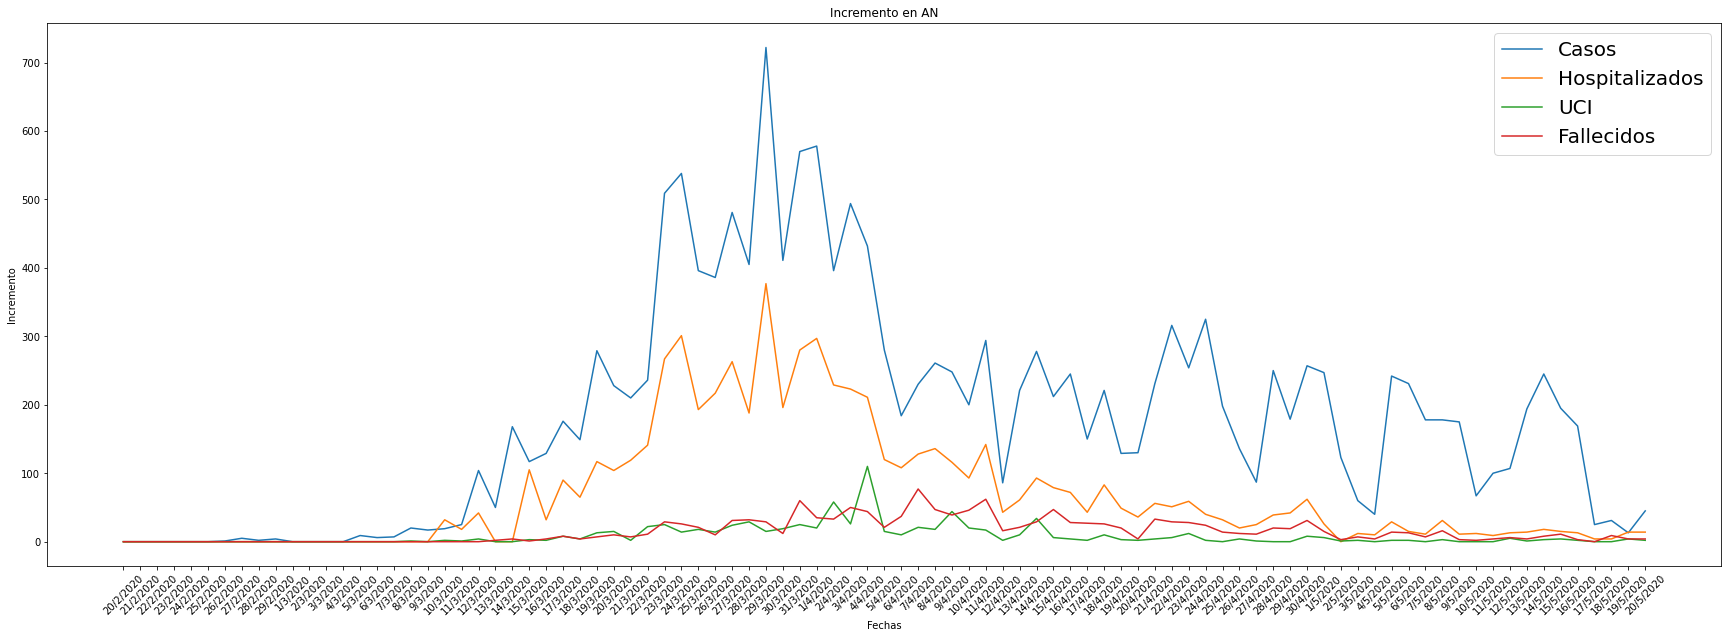

AR


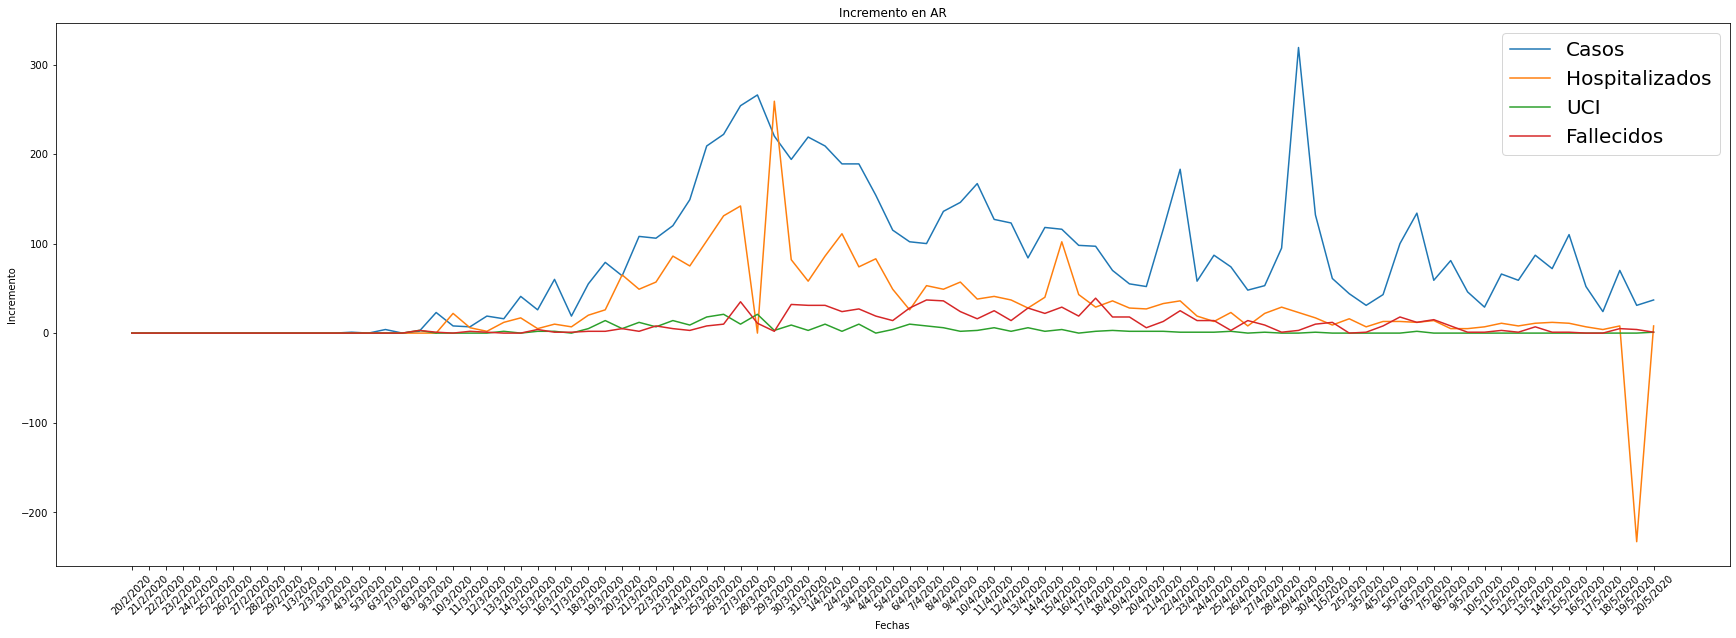

AS


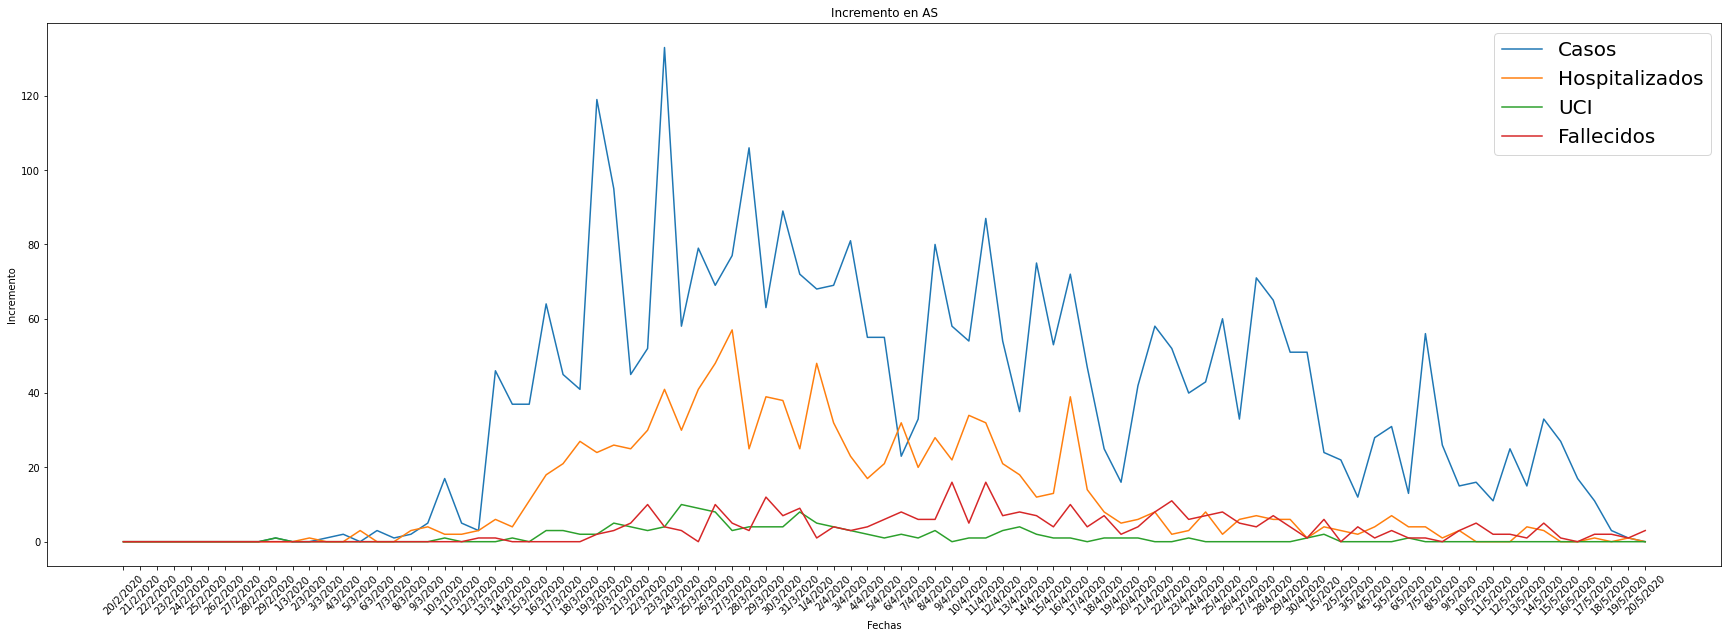

IB


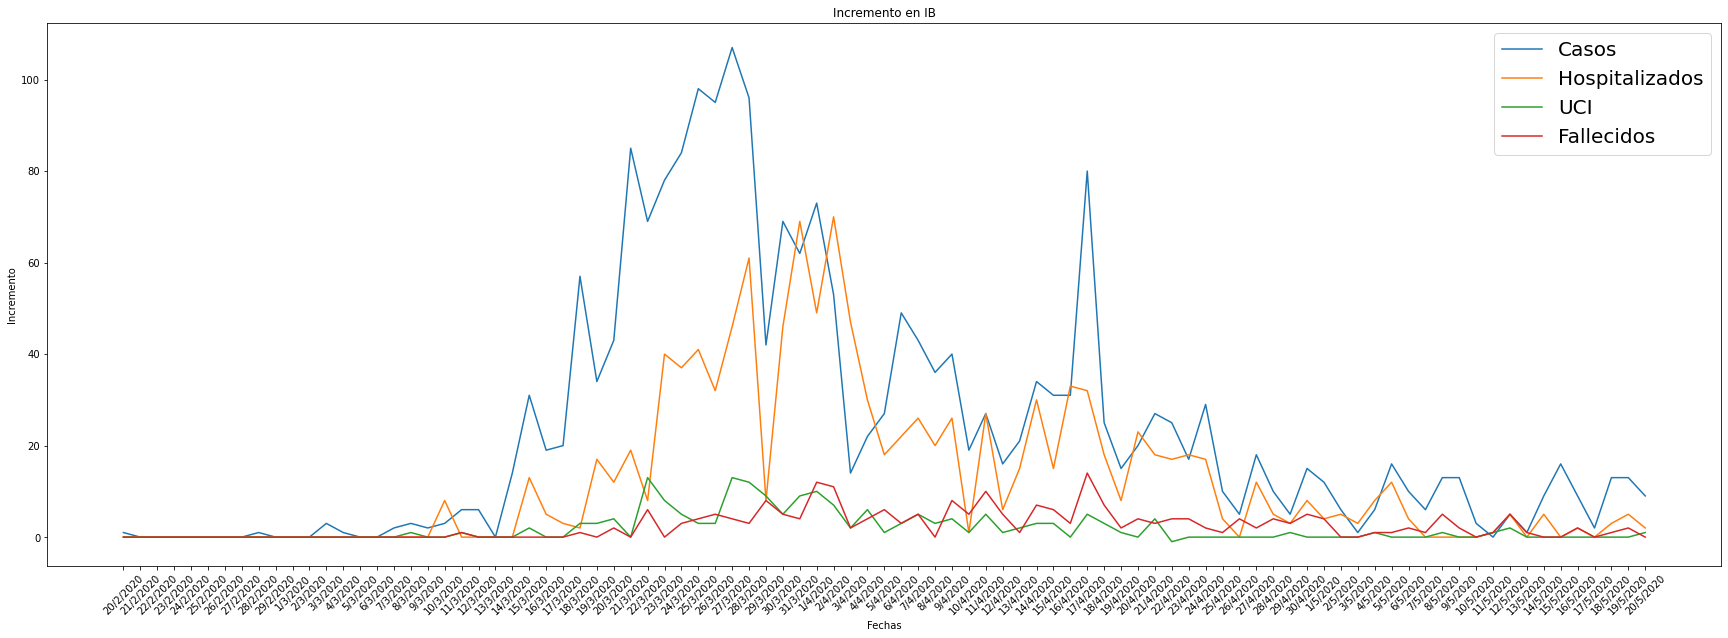

CN


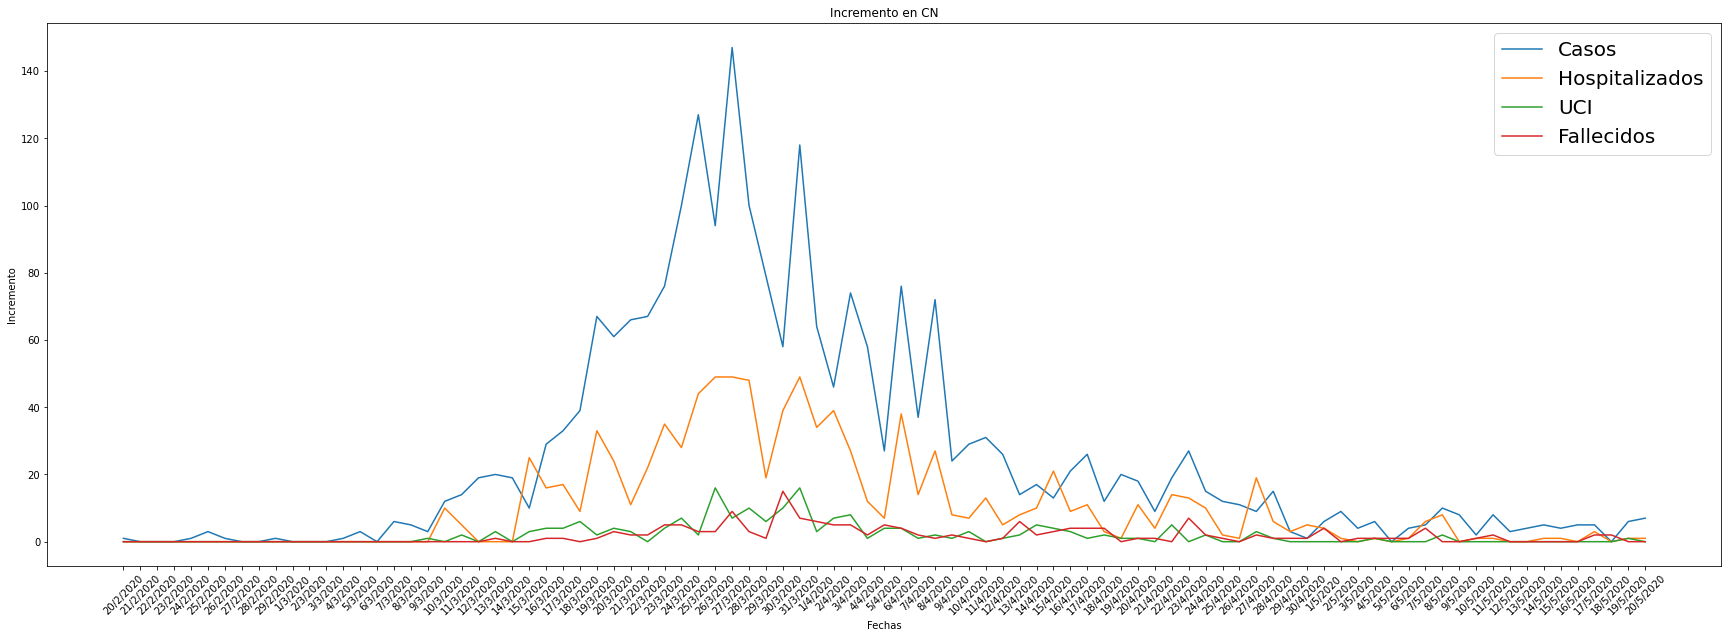

CB


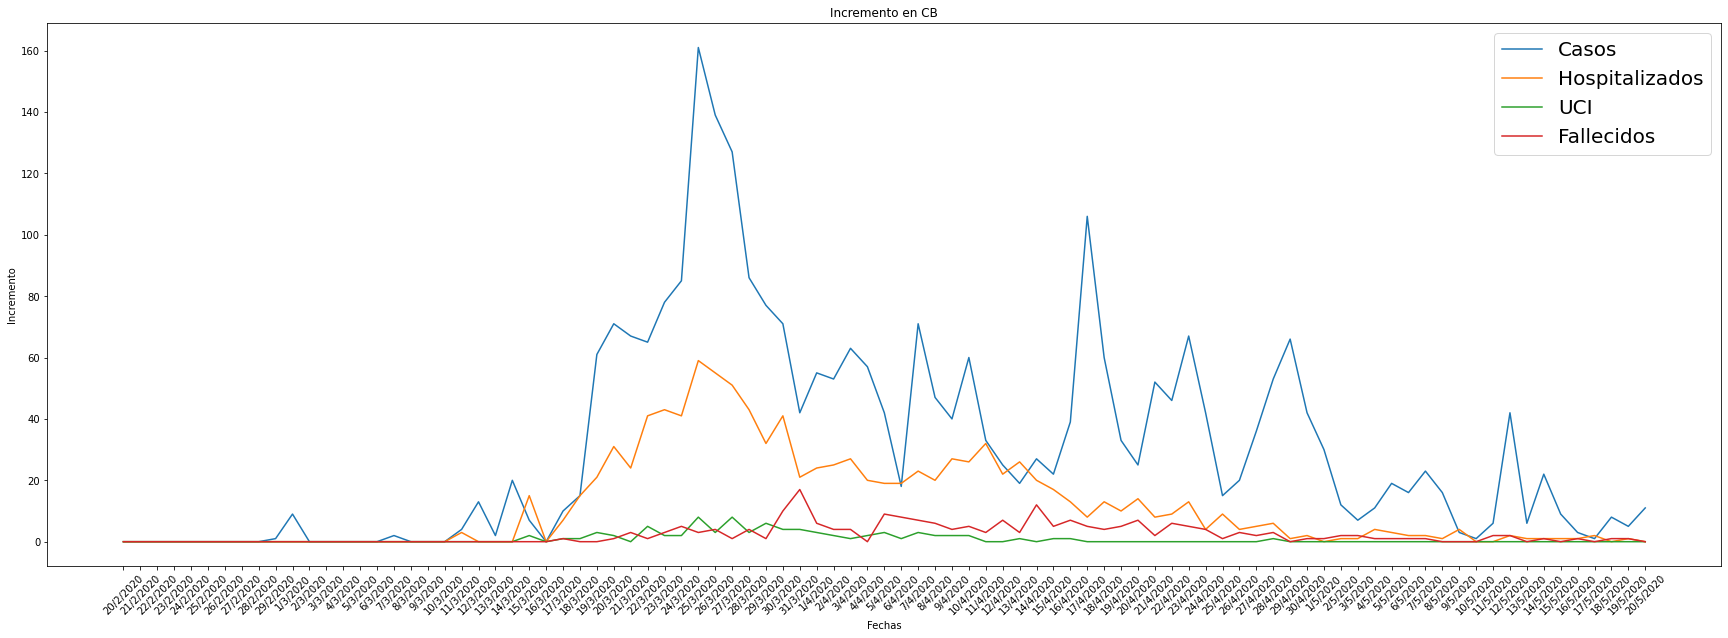

CM


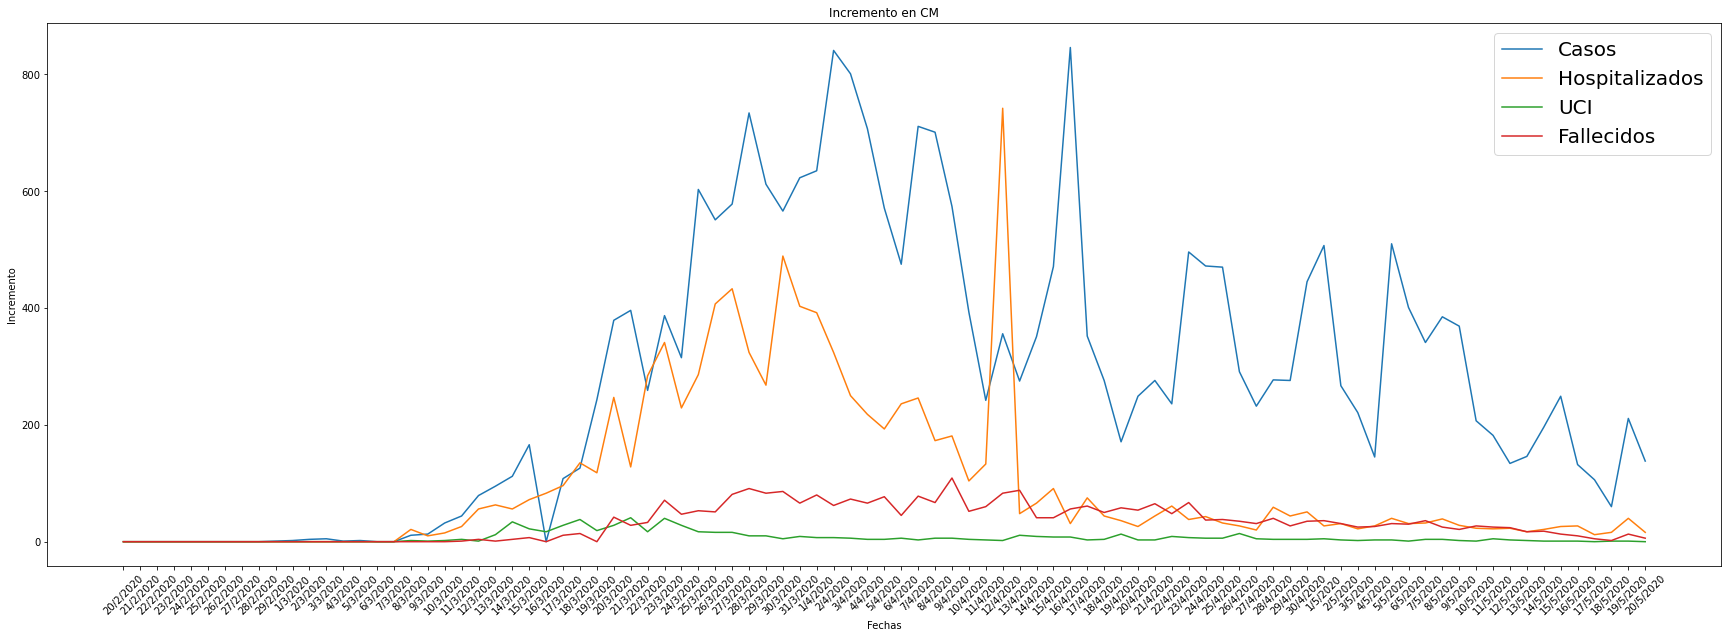

CL


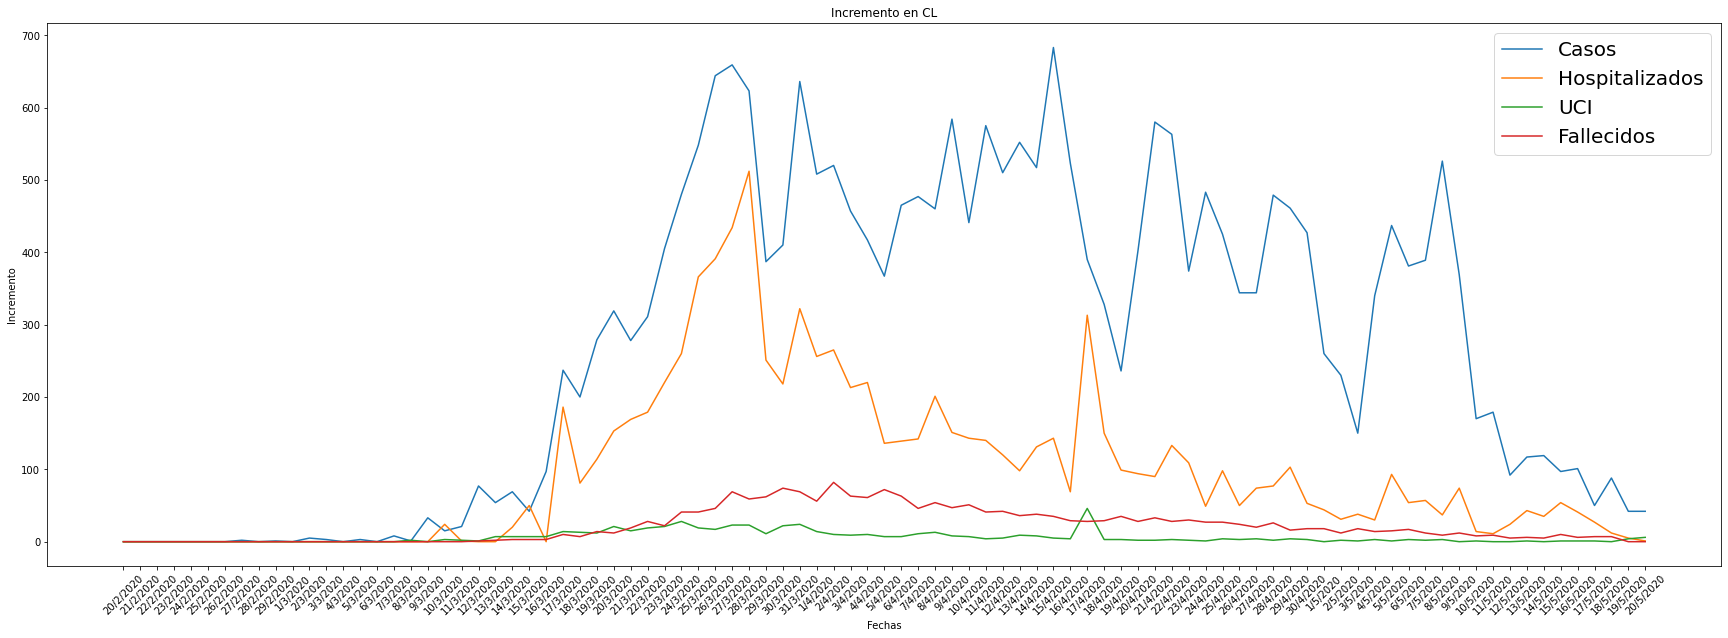

CT


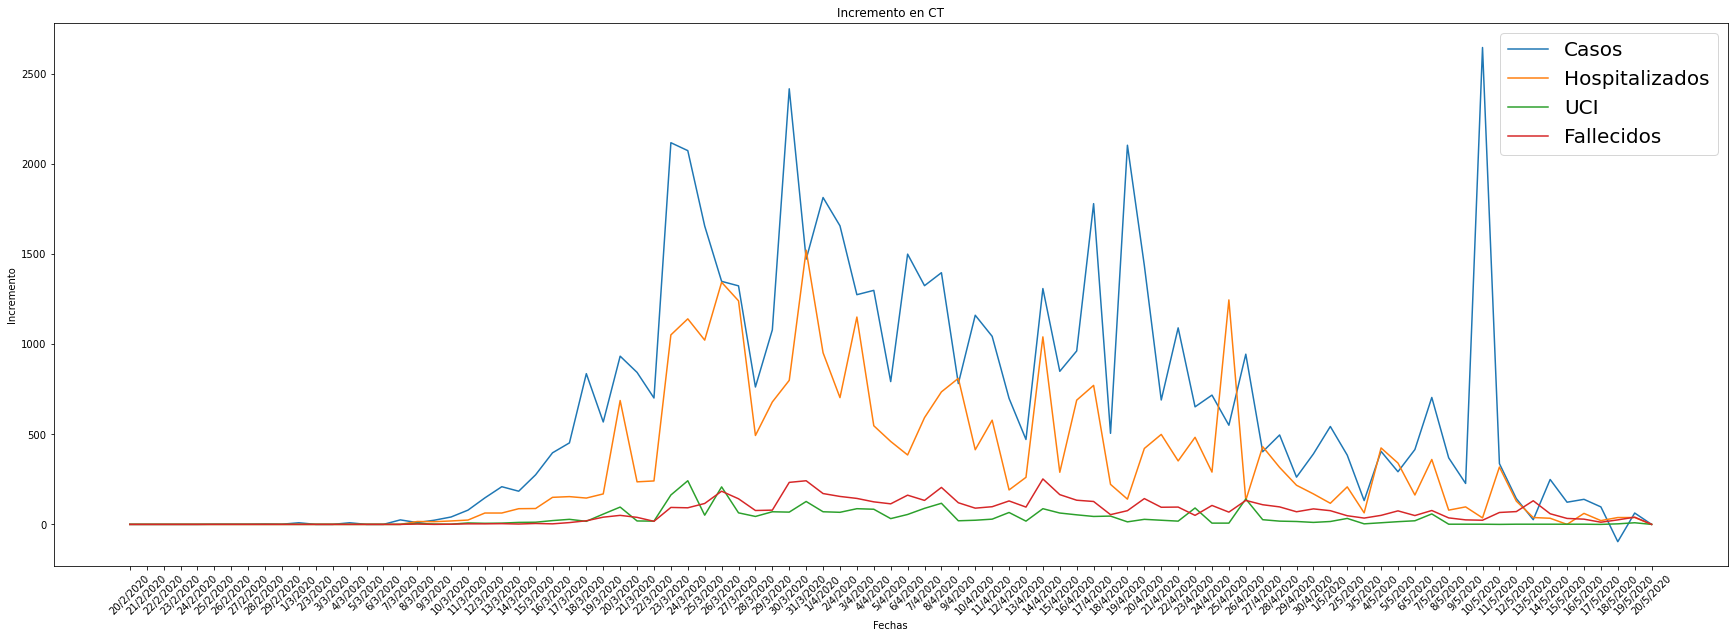

CE


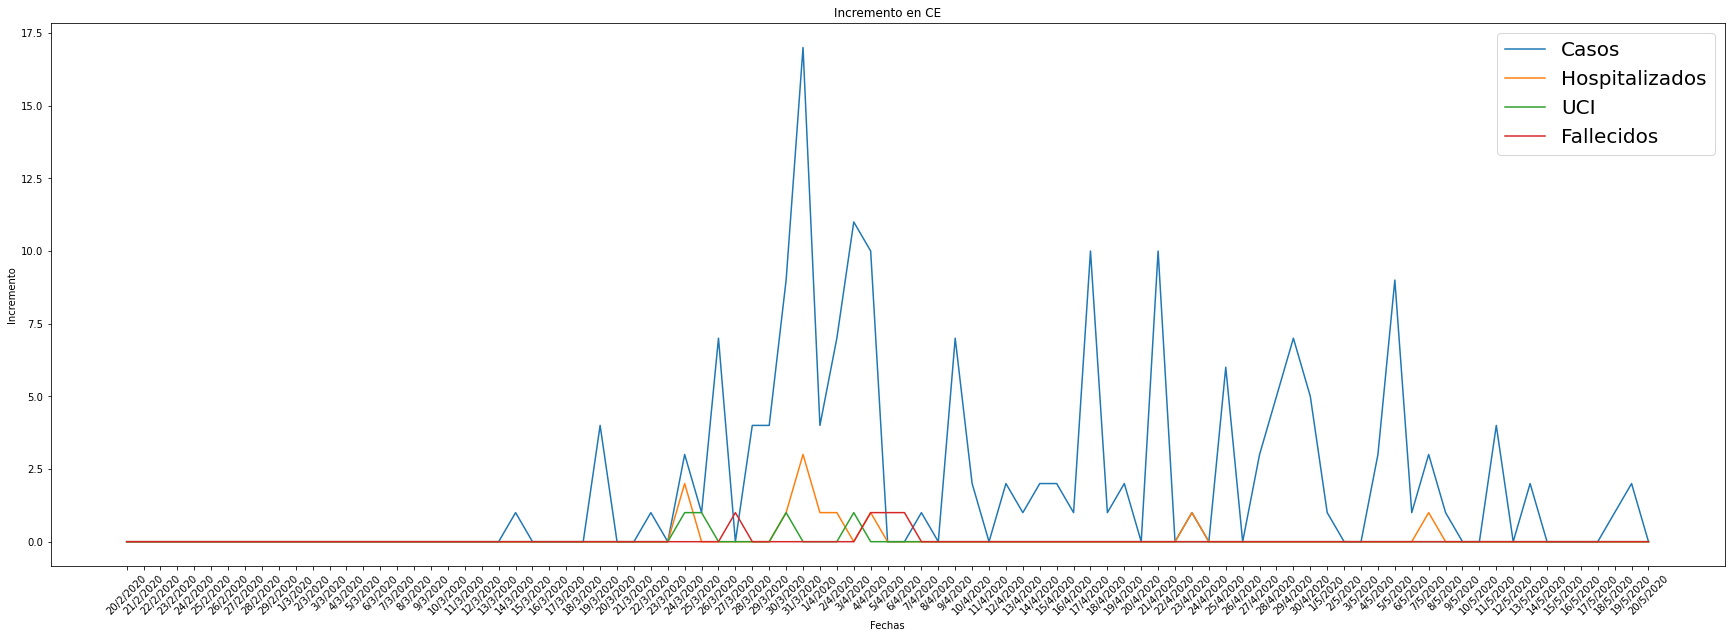

VC


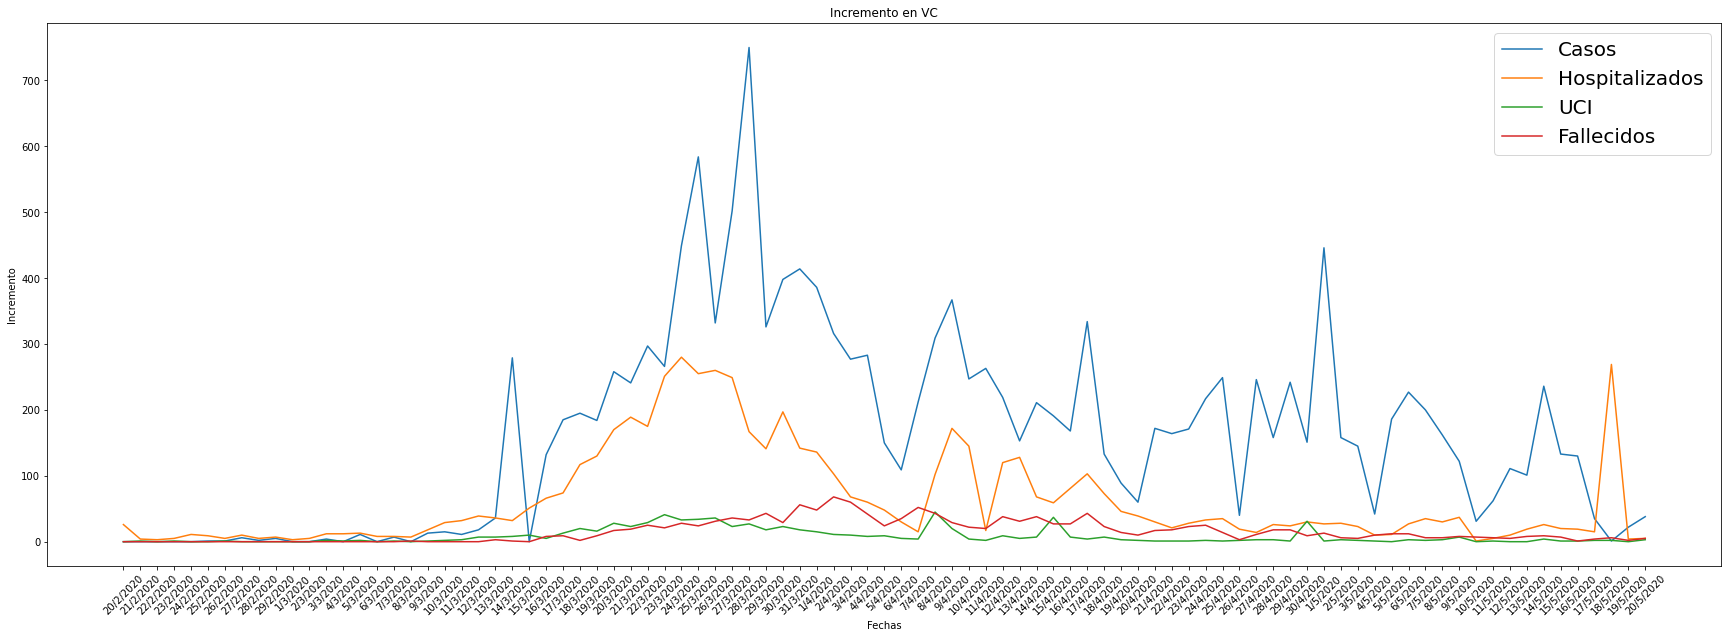

EX


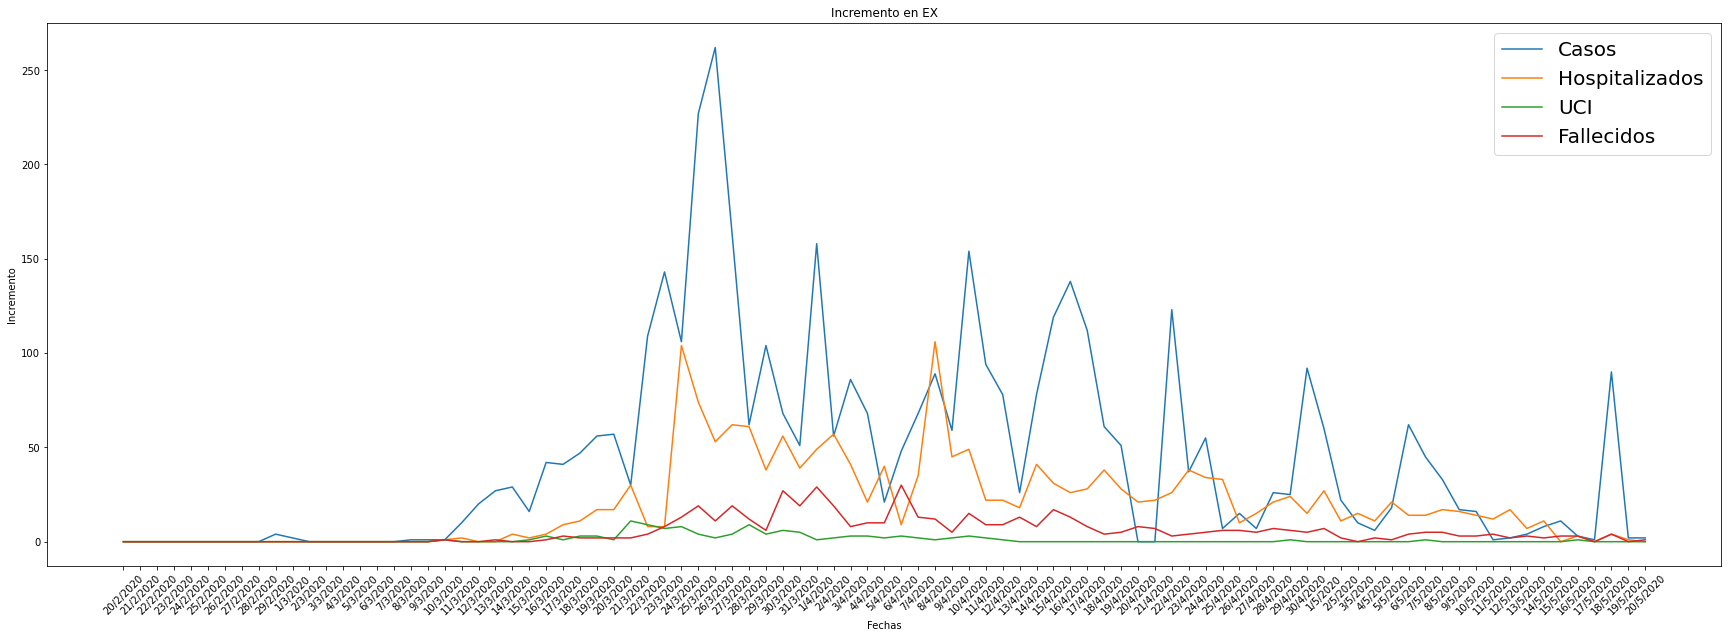

GA


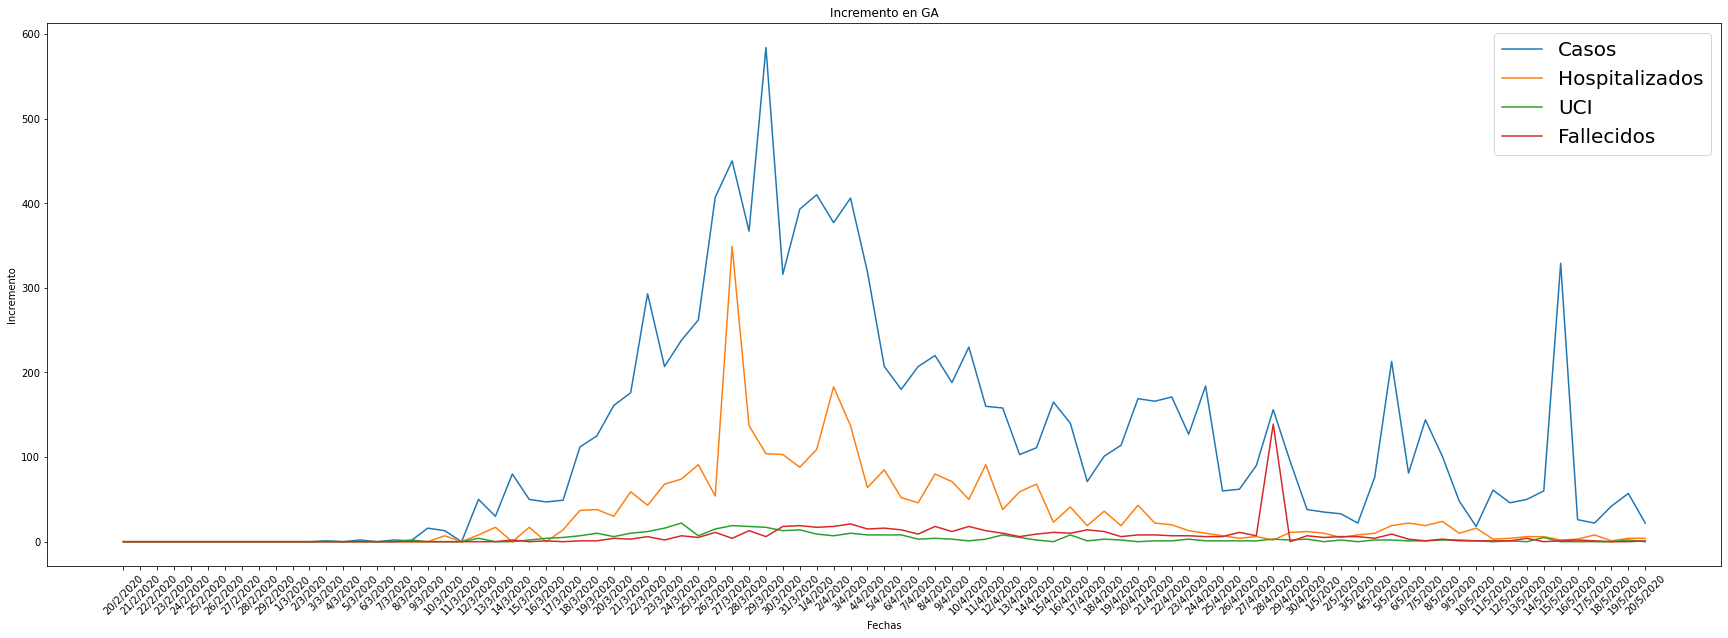

MD


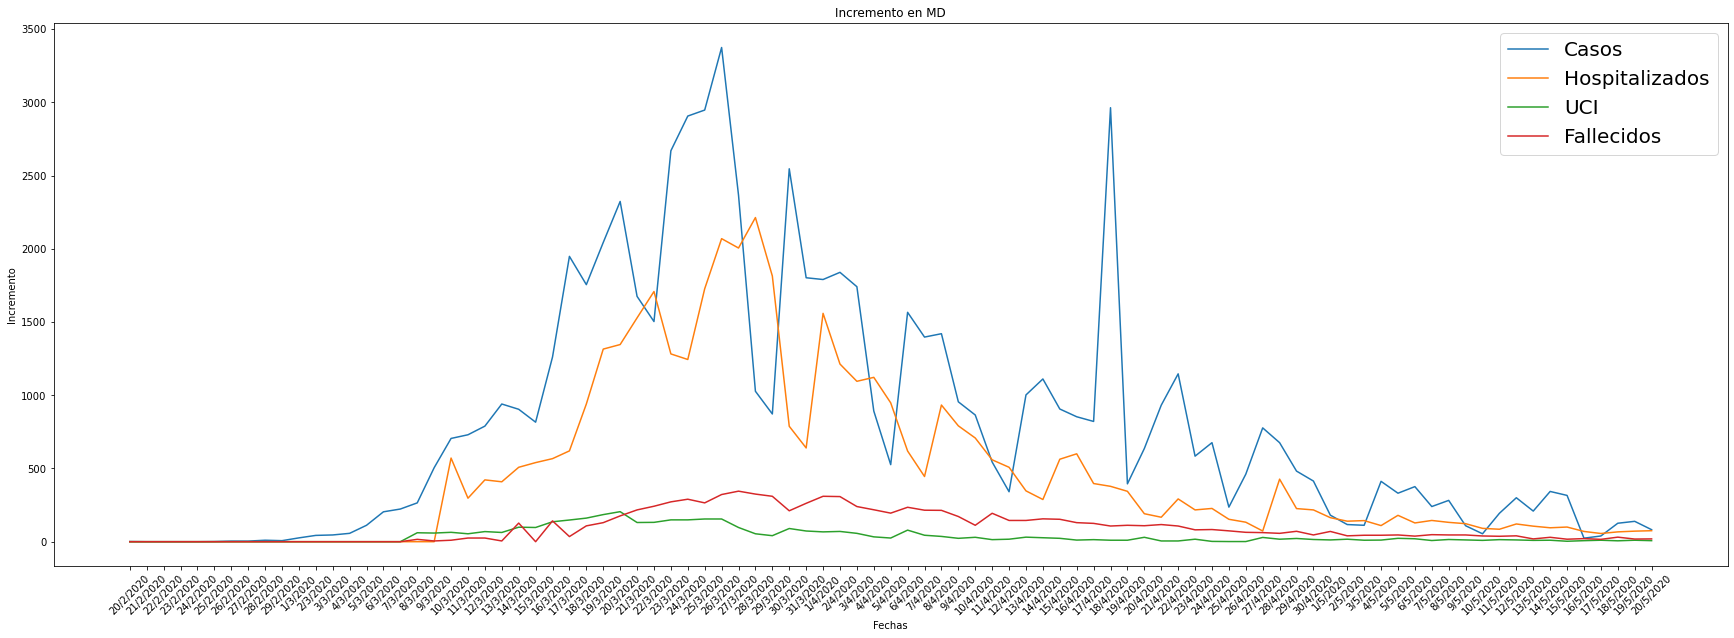

ML


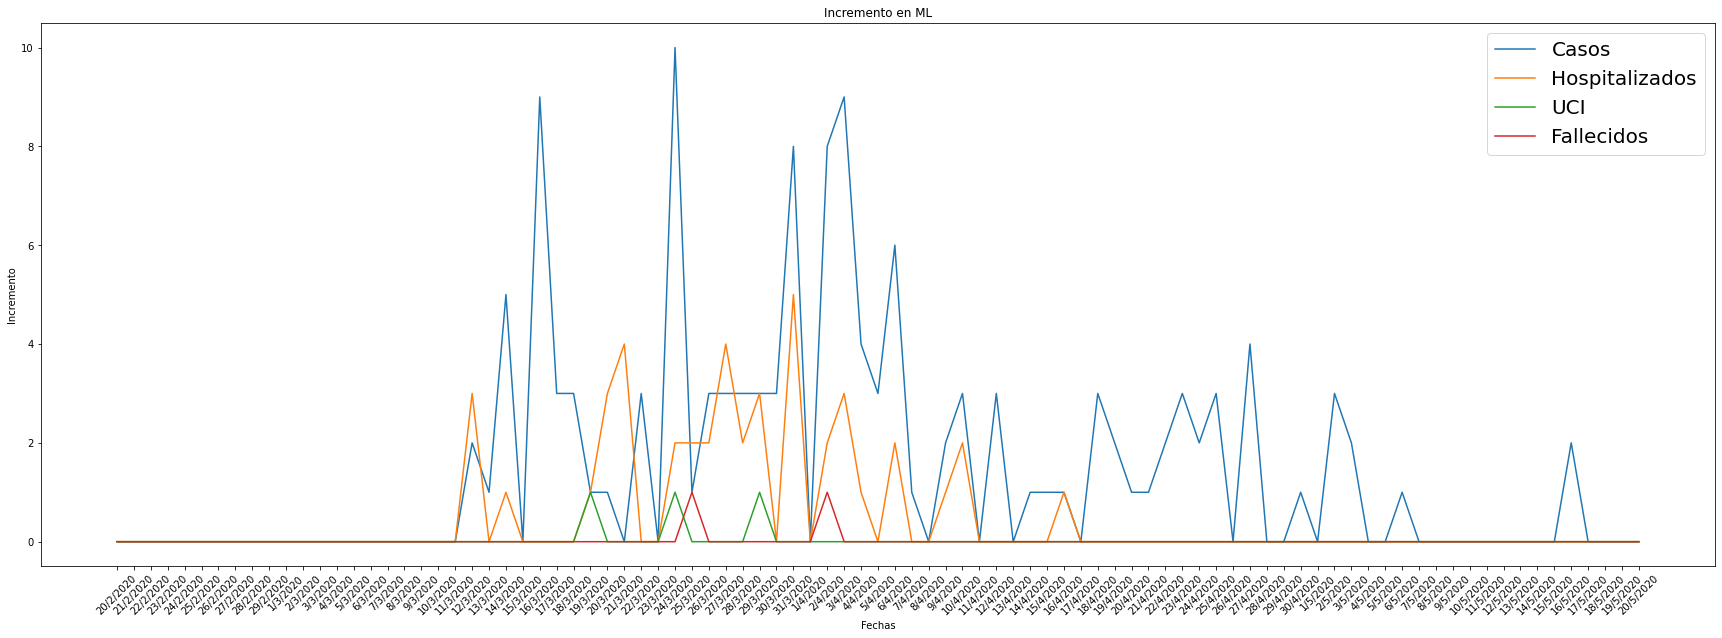

MC


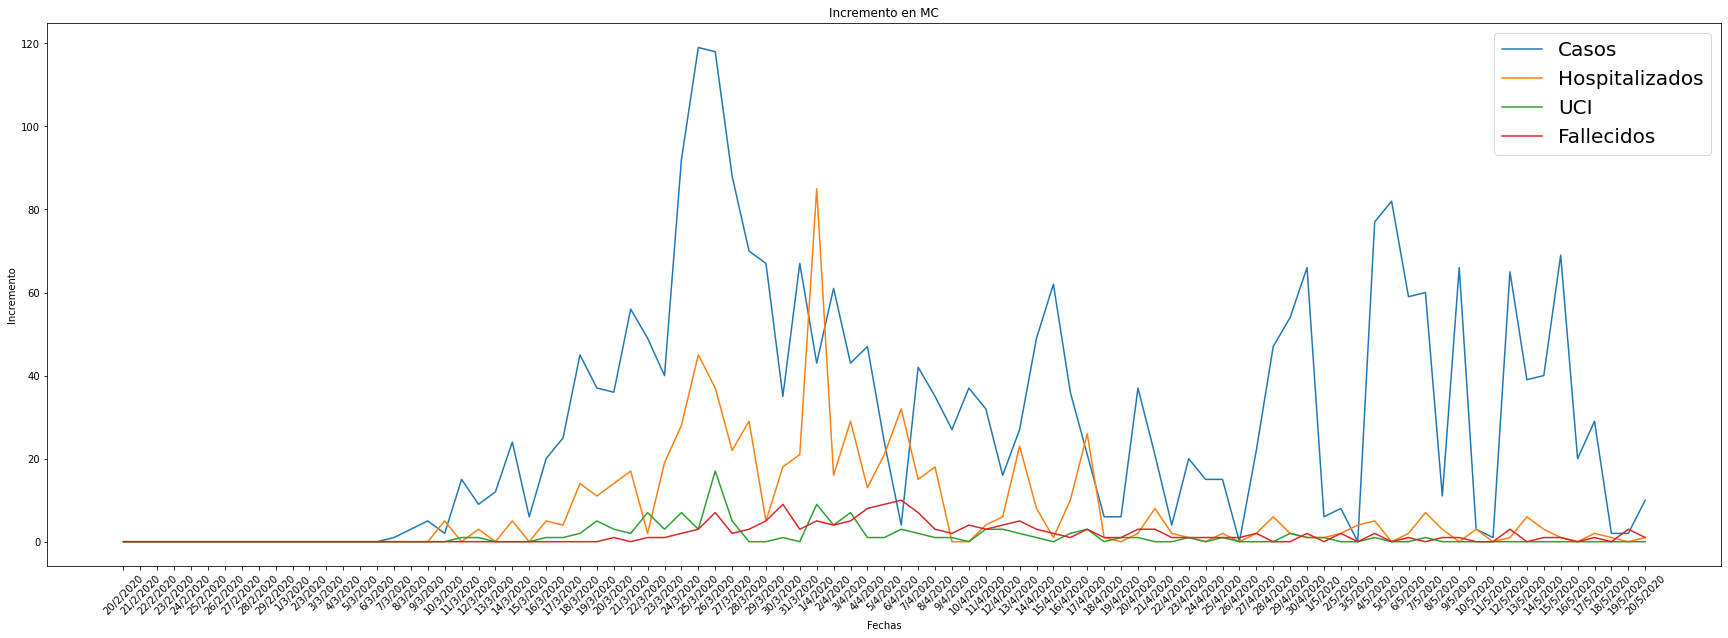

NC


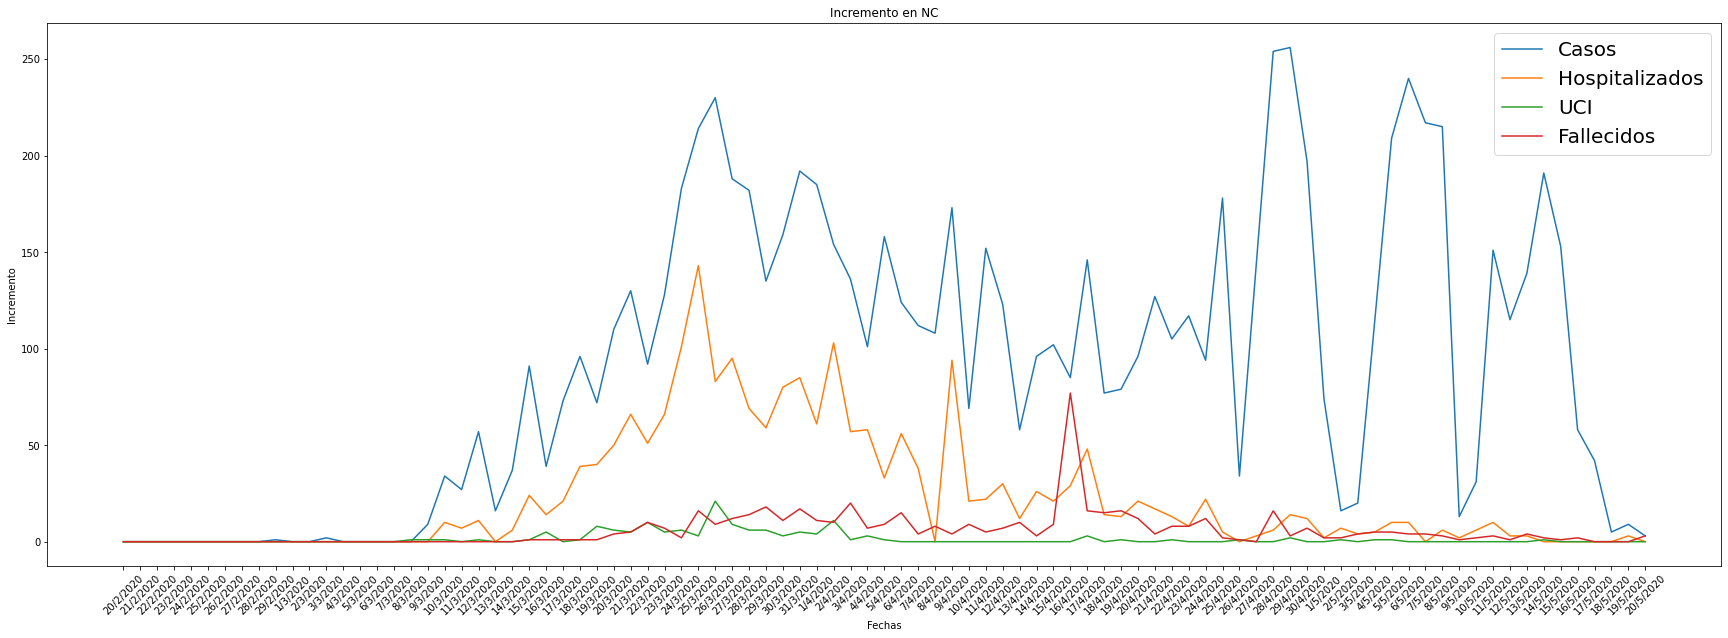

PV


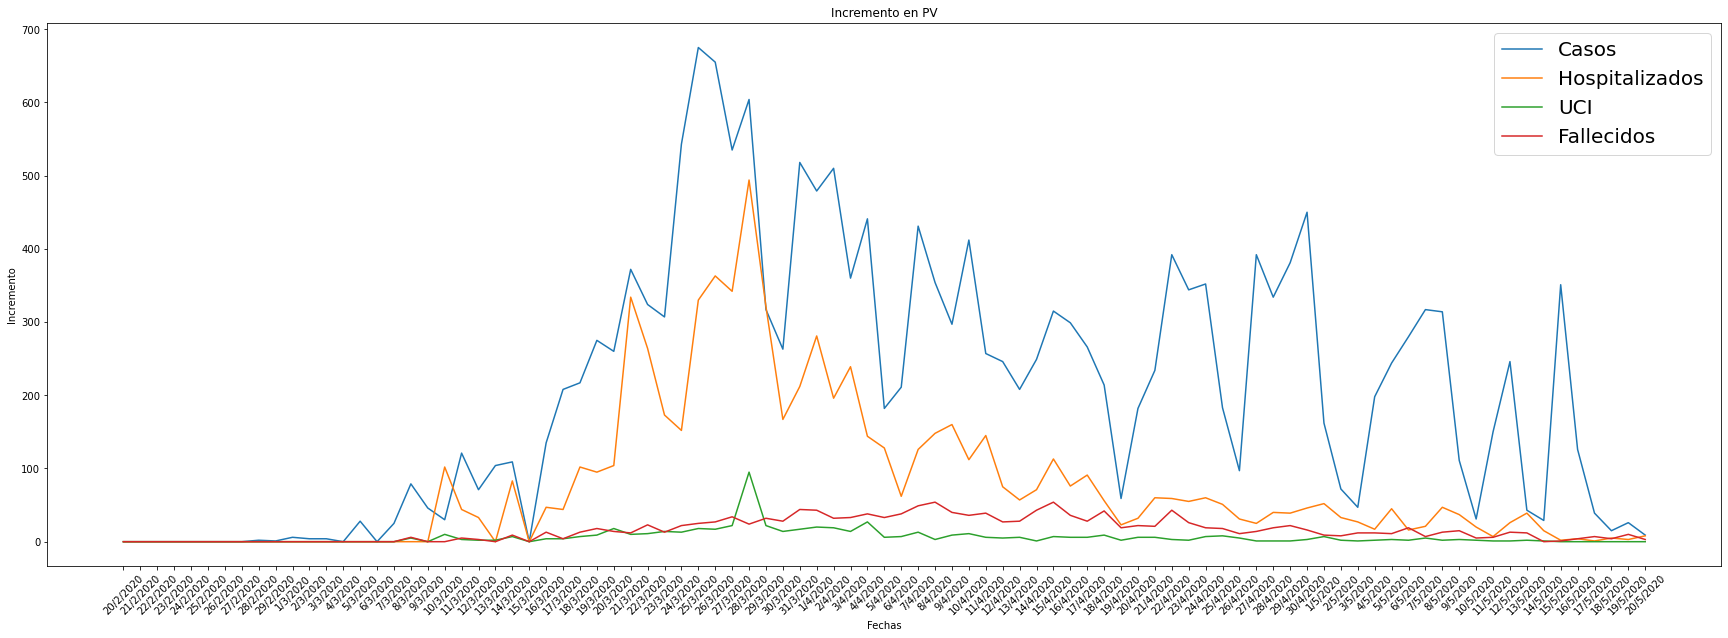

RI


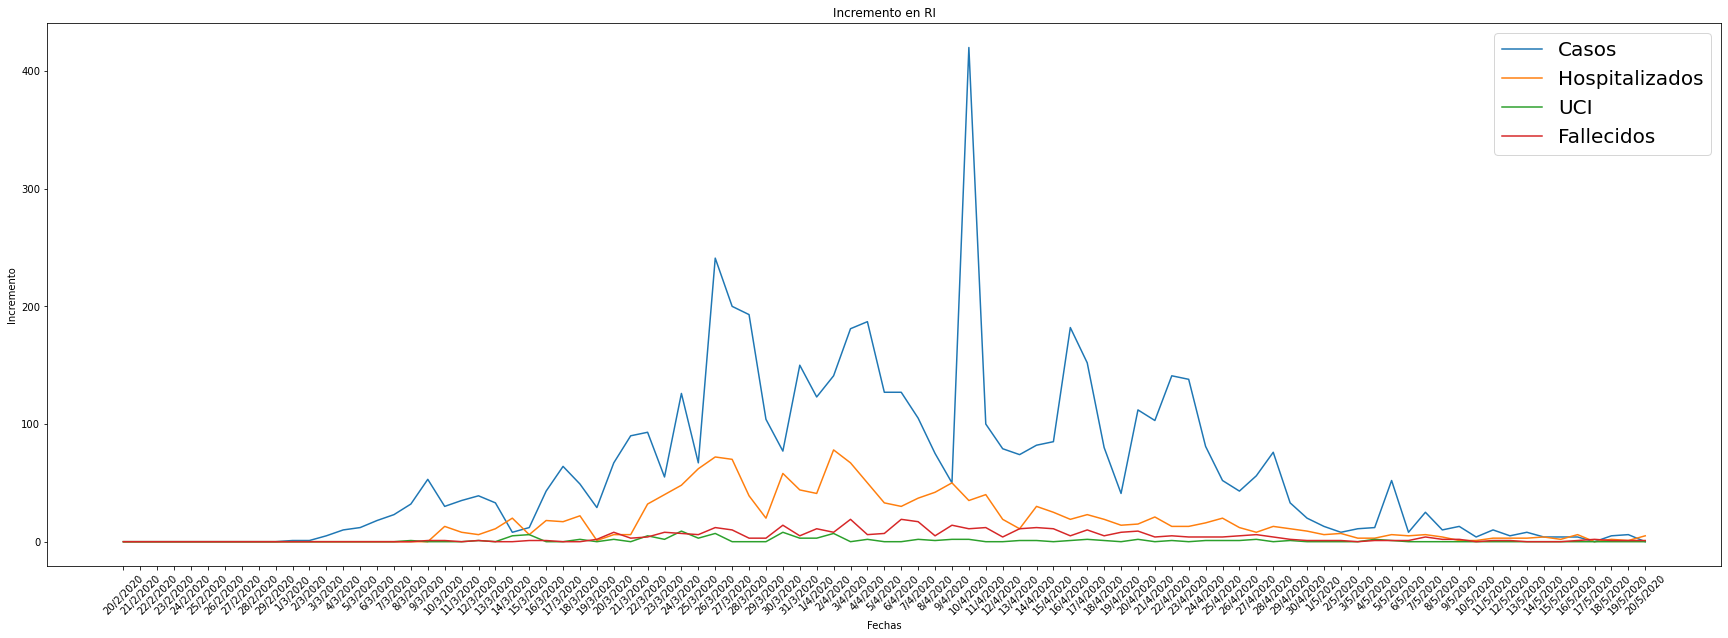

In [2]:
#Ejercicio 1 Parte 2. Leer el xls anterior y graficar los resultados por comunidad
from xlrd import open_workbook, colname
import matplotlib.pyplot as plt

#para cada comunidad
with open_workbook('data/covid_resultados_22.05.2020.xls',on_demand=True) as libro:
    estadisticas = {}
    
    hoja = libro.sheet_by_index(0)
    for comunidad in comunidades:
        print(comunidad)
        fechas = []
        inc_casos = []
        inc_hospitalizados = []
        inc_uci = []
        inc_fallecidos = []
        for i in range(1, hoja.nrows):
            fila = hoja.row(i)
            ccaa = fila[0].value
            if ccaa == comunidad:
                fechas.append(fila[1].value)
                inc_casos.append(fila[3].value)
                inc_hospitalizados.append(fila[9].value)
                inc_uci.append(fila[11].value)
                inc_fallecidos.append(fila[13].value)
        plt.figure(figsize=(30, 10))
        plt.title("Incremento en {}".format(comunidad))
        plt.xlabel("Fechas")
        plt.xticks(rotation=45)
        plt.ylabel("Incremento")
        plt.plot (fechas, inc_casos, fechas, inc_hospitalizados, fechas, inc_uci, fechas, inc_fallecidos)
        plt.legend(('Casos', 'Hospitalizados', 'UCI', 'Fallecidos'), prop = {'size': 20}, loc = 'upper right')
        plt.show()
        
#print(len(fechas))                    
#print(fechas)
#print(len(inc_casos))

                

In [ ]:
#Ejercicio 2, obtener un listado de productos de un sitio de compras en español
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

chromedriver_location = 'C:/chromedriver/chromedriver.exe'
driver = webdriver.Chrome(chromedriver_location)

url = "https://www.amazon.es/"
driver.get(url)

busqueda = input("Producto a buscar: ")
driver.find_element_by_xpath('//*[@id="twotabsearchtextbox"]').send_keys(busqueda)
driver.find_element_by_xpath('//*[@id="nav-search-submit-text"]/input').click()
time.sleep(2)
#Orden de precio ascendente
driver.find_element_by_xpath('//*[@id="s-result-sort-select"]/option[2]').click()
time.sleep(2)
resultados = driver.find_elements_by_xpath('//span[contains(@class, "SEARCH_RESULTS")]')
print("Total de productos encontrados en Página 1:", len(resultados))
i = 1
for resultado in resultados:
    productos = resultado.find_elements_by_class_name("a-size-base-plus.a-color-base.a-text-normal")
    for producto in productos:
        nombre = producto.text
    precios = resultado.find_elements_by_class_name("a-size-base.a-link-normal.a-text-normal")
    for precio in precios:
        precio = precio.text.replace("\n"," ")
    print("Producto {}: {}, Precio: {}".format(i, nombre, precio))
    i += 1
print("Fin")

In [5]:
#Ejercicio 3 Parte 1. Escuchar Twitter
import tweepy #https://github.com/tweepy/tweepy

from tweepy import Stream
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler

keyword = 'COVID-19'
filename = 'data/Tweets_' + keyword + ".json"
class MyListener (StreamListener):
    
    def on_data(self, data):
        try:
            with open (filename, 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error en el dato: %s" % str(e))
            return True
    def on_error(self, status):
        print(status)
        return True
    
#Credenciales del Twitter API
consumer_key = "6i6JAMqVnXym9kF33fK6U4MIE"
consumer_secret = "hJTsiq4bUbrbEupzonxIGgv8DyYexL5kQT06uvM2ICiFHRmMVx"
access_token = "1324422374377328643-klos5jxHQNblSJwtVwv1MBwgfB5lHM"
access_secret = "2M7lLj3UwxR8gMpsXsRdFh3MsqdrC9b6ve2sZyuiy7NrE"

auth=OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
twitter_stream = Stream (auth, MyListener())
twitter_stream.filter(track=[keyword])

KeyboardInterrupt: 